In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/fictional_character_battles_complex.csv')

In [3]:
df.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [11]:
df.shape

(2351, 8)

In [12]:
df.columns

Index(['Character', 'Universe', 'Strength', 'Speed', 'Intelligence',
       'SpecialAbilities', 'Weaknesses', 'BattleOutcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Universe          2351 non-null   object
 2   Strength          2351 non-null   int64 
 3   Speed             2351 non-null   int64 
 4   Intelligence      2351 non-null   int64 
 5   SpecialAbilities  2351 non-null   object
 6   Weaknesses        2351 non-null   object
 7   BattleOutcome     2351 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 147.1+ KB


**Note** - No null record

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Strength,2351.0,5.442790,2.897105,1.0,3.0,5.0,8.0,10.0
Speed,2351.0,5.484900,2.858895,1.0,3.0,6.0,8.0,10.0
Intelligence,2351.0,5.550829,2.863540,1.0,3.0,6.0,8.0,10.0
BattleOutcome,2351.0,0.279030,0.448618,0.0,0.0,0.0,1.0,1.0


<Axes: xlabel='Universe', ylabel='count'>

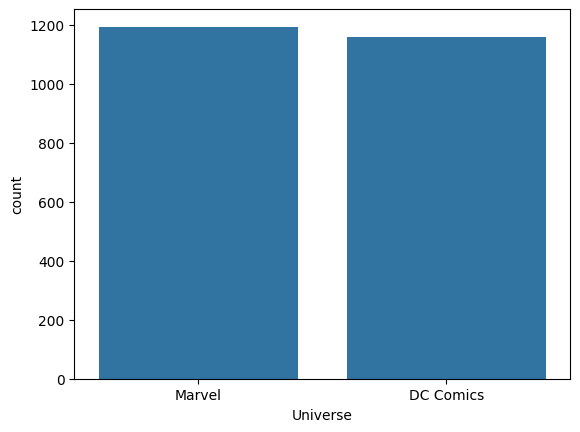

In [10]:
sns.countplot(x='Universe', data=df)

<Axes: xlabel='BattleOutcome', ylabel='count'>

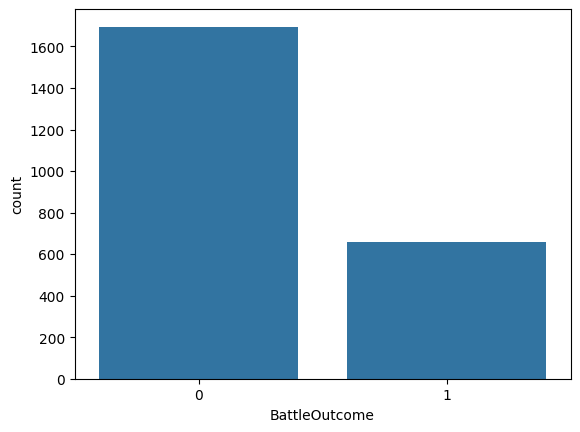

In [9]:
sns.countplot(x='BattleOutcome', data=df)

<Axes: xlabel='SpecialAbilities', ylabel='count'>

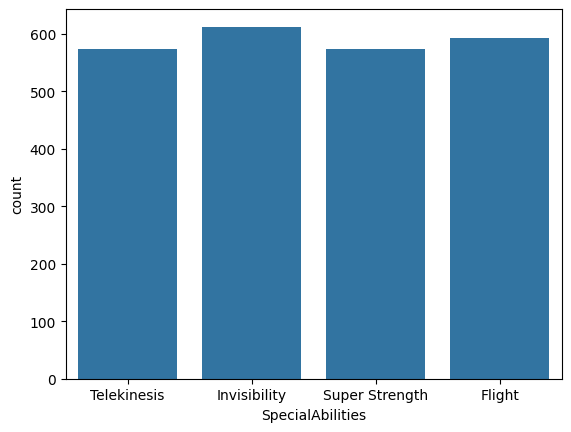

In [13]:
sns.countplot(x='SpecialAbilities', data=df)

<Axes: >

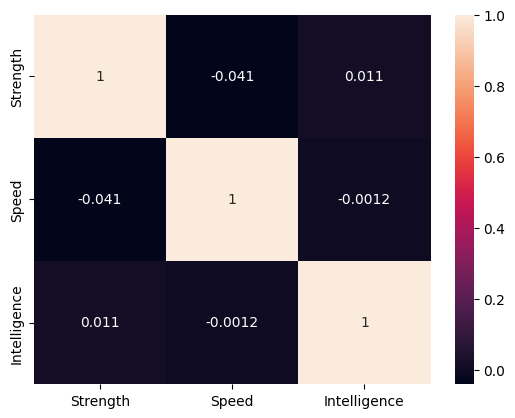

In [16]:
sns.heatmap(df[['Strength', 'Speed', 'Intelligence']].corr(), annot=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [17]:
df['Character'] = label_encoder.fit_transform(df['Character'])
df['Universe'] = label_encoder.fit_transform(df['Universe'])
df['SpecialAbilities'] = label_encoder.fit_transform(df['SpecialAbilities'])
df['Weaknesses'] = label_encoder.fit_transform(df['Weaknesses'])

In [18]:
X = df.drop('BattleOutcome', axis=1)
y = df['BattleOutcome']

In [20]:
X.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses
0,7,1,7,8,3,3,0
1,3,1,4,7,9,3,0
2,3,0,8,7,5,3,1
3,4,0,5,6,10,3,0
4,2,1,7,6,2,1,1


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: BattleOutcome, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2115, 7), (236, 7), (2115,), (236,))

In [26]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [30]:
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'{model_name} Accuracy: {accuracy:.2f}')
  print(report)
  print('-'*60)

Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       178
           1       0.65      0.52      0.58        58

    accuracy                           0.81       236
   macro avg       0.75      0.71      0.73       236
weighted avg       0.80      0.81      0.81       236

------------------------------------------------------------
Support Vector Classifier Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       178
           1       0.77      0.41      0.54        58

    accuracy                           0.83       236
   macro avg       0.80      0.69      0.72       236
weighted avg       0.82      0.83      0.81       236

------------------------------------------------------------
Decision Tree Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       178
          